<img src="images/utfsm.png" alt="" width="200px" align="right"/>
# USM Numérica
## Libraría Pandas
### Objetivos
1. Conocer los principales comandos de la librería pandas
2. Utilizar pandas para limpieza y manipulación de datos.

## Sobre el autor
### Sebastián Flores
#### ICM UTFSM
#### sebastian.flores@usm.cl

## Sobre la presentación
#### Contenido creada en ipython notebook (jupyter)
#### Versión en Slides gracias a RISE de Damián Avila
Software:
* python 2.7 o python 3.1
* pandas 0.16.1

Opcional:
* numpy 1.9.2
* matplotlib 1.3.1

## 0.1 Instrucciones
Las instrucciones de instalación y uso de un ipython notebook se encuentran en el siguiente [link](link).

Después de descargar y abrir el presente notebook, recuerden:
* Desarrollar los problemas de manera secuencial.
* Guardar constantemente con *`Ctr-S`* para evitar sorpresas.
* Reemplazar en las celdas de código donde diga *`FIX_ME`* por el código correspondiente.
* Ejecutar cada celda de código utilizando *`Ctr-Enter`*

## 0.2 Licenciamiento y Configuración
Ejecutar la siguiente celda mediante *`Ctr-Enter`*.

In [ ]:
"""
IPython Notebook v4.0 para python 3.0
Librerías adicionales: numpy, scipy, matplotlib. (EDITAR EN FUNCION DEL NOTEBOOK!!!)
Contenido bajo licencia CC-BY 4.0. Código bajo licencia MIT. 
(c) Sebastian Flores, Christopher Cooper, Alberto Rubio, Pablo Bunout.
"""
# Configuración para recargar módulos y librerías dinámicamente
%reload_ext autoreload
%autoreload 2

# Configuración para graficos en línea
%matplotlib inline

# Configuración de estilo
from IPython.core.display import HTML
HTML(open("./style/slides.css", "r").read())

## Aprender haciendo

Consideraremos el siguiente archivo `data.csv` que contiene datos incompletos:

In [201]:
%%bash
cat data/data.csv

diametro;altura;volumen;tipo_de_arbol
11.2;75;19.9;Cherrie Tree
11.3;79;24.2;Cherry Tree
11.4;76;21.0;Cherry Tree
11.4;76;21.4;Apple Tree
13.7;71;25.7;Cherry Tree
13.8;64;24.9;Cherry Tree
14.0;78;34.5;Cherrie Tree
14.2;80;31.7;Cherry Tree
;74;36.3;Apple Tree
16.0;72;38.3;Cherry Tree
16.3;77;42.6;Cherry Tree
17.3;81;55.4;Apple Tree
17.5;;55.7;Cherry Tree
17.9;80;58.3;Cherry Tree
18.0;80;51.5;Cherry Tree
18.0;;51.0;
20.6;;;Cherry Tree


## 1.- ¿Porqué utilizar pandas?

**Razón oficial**:
Porque en numpy no es posible mezclar tipos de datos, lo cual complica cargar, usar, limpiar y guardar datos mixtos.

**Razón personal**:
Porque habían cosas que en R eran más fáciles pero no pythonísticas. La librería pandas es un excelente compromiso. 

In [202]:
import numpy as np
df = np.loadtxt("data/data.csv", delimiter=";", dtype=str)
print( df )

[['diametro' 'altura' 'volumen' 'tipo_de_arbol']
 ['11.2' '75' '19.9' 'Cherrie Tree']
 ['11.3' '79' '24.2' 'Cherry Tree']
 ['11.4' '76' '21.0' 'Cherry Tree']
 ['11.4' '76' '21.4' 'Apple Tree']
 ['13.7' '71' '25.7' 'Cherry Tree']
 ['13.8' '64' '24.9' 'Cherry Tree']
 ['14.0' '78' '34.5' 'Cherrie Tree']
 ['14.2' '80' '31.7' 'Cherry Tree']
 ['' '74' '36.3' 'Apple Tree']
 ['16.0' '72' '38.3' 'Cherry Tree']
 ['16.3' '77' '42.6' 'Cherry Tree']
 ['17.3' '81' '55.4' 'Apple Tree']
 ['17.5' '' '55.7' 'Cherry Tree']
 ['17.9' '80' '58.3' 'Cherry Tree']
 ['18.0' '80' '51.5' 'Cherry Tree']
 ['18.0' '' '51.0' '']
 ['20.6' '' '' 'Cherry Tree']]


In [205]:
import pandas as pd
df = pd.read_csv("data/data.csv", sep=";")
print( df )
#df

    diametro  altura  volumen tipo_de_arbol
0       11.2      75     19.9  Cherrie Tree
1       11.3      79     24.2   Cherry Tree
2       11.4      76     21.0   Cherry Tree
3       11.4      76     21.4    Apple Tree
4       13.7      71     25.7   Cherry Tree
5       13.8      64     24.9   Cherry Tree
6       14.0      78     34.5  Cherrie Tree
7       14.2      80     31.7   Cherry Tree
8        NaN      74     36.3    Apple Tree
9       16.0      72     38.3   Cherry Tree
10      16.3      77     42.6   Cherry Tree
11      17.3      81     55.4    Apple Tree
12      17.5     NaN     55.7   Cherry Tree
13      17.9      80     58.3   Cherry Tree
14      18.0      80     51.5   Cherry Tree
15      18.0     NaN     51.0           NaN
16      20.6     NaN      NaN   Cherry Tree


In [207]:
inch2m = 0.0254
feet2m = 0.3048
df.diametro = df.diametro * inch2m
df.altura = df.altura * feet2m
df.volumen = df.volumen * (feet2m**3)
df.tipo_de_arbol = "Cherry Tree"
df

,diametro,altura,volumen,tipo_de_arbol
0,0.007226,6.967728,0.015957,Cherry Tree
1,0.007290,7.339340,0.019405,Cherry Tree
2,0.007355,7.060631,0.016839,Cherry Tree
3,0.007355,7.060631,0.017159,Cherry Tree
4,0.008839,6.596116,0.020607,Cherry Tree
5,0.008903,5.945795,0.019966,Cherry Tree
6,0.009032,7.246437,0.027664,Cherry Tree
7,0.009161,7.432243,0.025418,Cherry Tree
8,NaN,6.874825,0.029107,Cherry Tree
9,0.010323,6.689019,0.030711,Cherry Tree


In [208]:
print( df.columns )

Index([u'diametro', u'altura', u'volumen', u'tipo_de_arbol'], dtype='object')


In [209]:
print( df.index )

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')


In [210]:
print( df["altura"]*2 )

0     13.935456
1     14.678680
2     14.121262
3     14.121262
4     13.192232
5     11.891589
6     14.492874
7     14.864486
8     13.749650
9     13.378038
10    14.307068
11    15.050292
12          NaN
13    14.864486
14    14.864486
15          NaN
16          NaN
Name: altura, dtype: float64


In [211]:
print( df["diametro"]**2 * df["altura"] / df.volumen )

0     0.022799
1     0.020102
2     0.022682
3     0.022258
4     0.025006
5     0.023606
6     0.021370
7     0.024540
8          NaN
9     0.023209
10    0.023160
11    0.021103
12         NaN
13    0.021203
14    0.024272
15         NaN
16         NaN
dtype: float64


## 2. Lo básico de pandas
* Pandas imita los dataframes de R, pero en python. Todo lo que no tiene sentido es porque se parece demasiado a R.
* Pandas permite tener datos como en tablas de excel: datos en una columna pueden ser mixtos.
* La idea central es que la indexación es "a medida": las columnas y las filas (index) pueden ser enteros o floats, pero también pueden ser strings. Depende de lo que tenga sentido.
* Los elementos básicos de pandas son:
 * **Series**: Conjunto de valores con indexación variable.
 * **DataFrames**: Conjunto de Series.

### 2.1 Series
Una serie es un conveniente conjunto de datos, como una columna de datos de excel, pero con indexación más genérica.

```python
pd.Series(self, data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
```

In [ ]:
import pandas as pd
s1 = pd.Series([False, 1, 2., "3", 4 + 0j])
print( s1 )

In [ ]:
# Casting a otros tipos
print( list(s1) )
print( set(s1) )
print( np.array(s1) )

In [225]:
# Ejemplo de operatoria
s0 = pd.Series(range(6), index=range(6))
s1 = pd.Series([1,2,3], index=[1,2,3])
s2 = pd.Series([4,5,6], index=[4,5,6])
s3 = pd.Series([10,10,10], index=[1,4,6])

In [217]:
print( s0 )

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64


In [219]:
print( s0 + s1 )

0   NaN
1     2
2     4
3     6
4   NaN
5   NaN
dtype: float64


In [220]:
print( s0 + s1 + s2 )

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
dtype: float64


In [222]:
print( s0.add(s1, fill_value=0) )

0    0
1    2
2    4
3    6
4    4
5    5
dtype: float64


### 2.2 DataFrames

Un Dataframe es una colección de Series con una indexación común. Como una planilla de excel.

```python
pd.DataFrame(self, data=None, index=None,
             columns=None, dtype=None, copy=False)
```

In [223]:
# dict
df = pd.DataFrame({"col1":[1,2,3,4], 
                   "col2":[1., 2., 3., 4.], 
                   "col3":["uno", "dos", "tres", "cuatro"]})
df

,col1,col2,col3
0,1,1,uno
1,2,2,dos
2,3,3,tres
3,4,4,cuatro


## 3.1 Obteniendo datos
  1. **Archivo csv**
  1. **Archivo json**
  1. **Archivo de excel**: convertir a csv cuidadosamente (elegir un separador apropiado, no comentar strings).

In [228]:
# csv
df = pd.read_csv("data/data.csv", sep=";")
df

,diametro,altura,volumen,tipo_de_arbol
0,11.2,75,19.9,Cherrie Tree
1,11.3,79,24.2,Cherry Tree
2,11.4,76,21.0,Cherry Tree
3,11.4,76,21.4,Apple Tree
4,13.7,71,25.7,Cherry Tree
5,13.8,64,24.9,Cherry Tree
6,14.0,78,34.5,Cherrie Tree
7,14.2,80,31.7,Cherry Tree
8,NaN,74,36.3,Apple Tree
9,16.0,72,38.3,Cherry Tree


In [227]:
df = pd.read_json("data/data.json")
df

,altura,diametro,tipo_de_arbol,volumen
1,79,11.3,Cherry Tree,24.2
10,77,16.3,Cherry Tree,42.6
12,NaN,17.5,Cherry Tree,55.7
13,80,17.9,Cherry Tree,58.3
14,80,18.0,Cherry Tree,51.5
16,NaN,20.6,Cherry Tree,NaN
2,76,11.4,Cherry Tree,21.0
4,71,13.7,Cherry Tree,25.7
5,64,13.8,Cherry Tree,24.9
7,80,14.2,Cherry Tree,31.7


## 4.- Inspeccionando datos
 1. Accesando las columnas
 1. shape
 1. head, tail, describe
 1. histogram
 1. pd.scatter_matrix
 1. count_values

In [229]:
df = pd.read_csv("data/data.csv", sep=";")
df.columns

Index([u'diametro', u'altura', u'volumen', u'tipo_de_arbol'], dtype='object')

In [232]:
df['altura']

0     75
1     79
2     76
3     76
4     71
5     64
6     78
7     80
8     74
9     72
10    77
11    81
12   NaN
13    80
14    80
15   NaN
16   NaN
Name: altura, dtype: float64

In [233]:
df.shape

(17, 4)

In [234]:
df.head()

,diametro,altura,volumen,tipo_de_arbol
0,11.2,75,19.9,Cherrie Tree
1,11.3,79,24.2,Cherry Tree
2,11.4,76,21.0,Cherry Tree
3,11.4,76,21.4,Apple Tree
4,13.7,71,25.7,Cherry Tree


In [235]:
df.tail()

,diametro,altura,volumen,tipo_de_arbol
12,17.5,NaN,55.7,Cherry Tree
13,17.9,80,58.3,Cherry Tree
14,18.0,80,51.5,Cherry Tree
15,18.0,NaN,51.0,NaN
16,20.6,NaN,NaN,Cherry Tree


In [236]:
df.describe()

,diametro,altura,volumen
count,16.000000,14.000000,16.000000
mean,15.162500,75.928571,37.025000
std,2.948418,4.615430,13.773816
min,11.200000,64.000000,19.900000
25%,13.125000,74.250000,24.725000
50%,15.100000,76.500000,35.400000
75%,17.600000,79.750000,51.125000
max,20.600000,81.000000,58.300000


In [289]:
df.describe(include="all")

,diametro,altura,volumen,tipo_de_arbol
count,16.000000,14.000000,16.000000,16
unique,NaN,NaN,NaN,3
top,NaN,NaN,NaN,Cherry Tree
freq,NaN,NaN,NaN,11
mean,15.162500,75.928571,37.025000,NaN
std,2.948418,4.615430,13.773816,NaN
min,11.200000,64.000000,19.900000,NaN
25%,13.125000,74.250000,24.725000,NaN
50%,15.100000,76.500000,35.400000,NaN
75%,17.600000,79.750000,51.125000,NaN


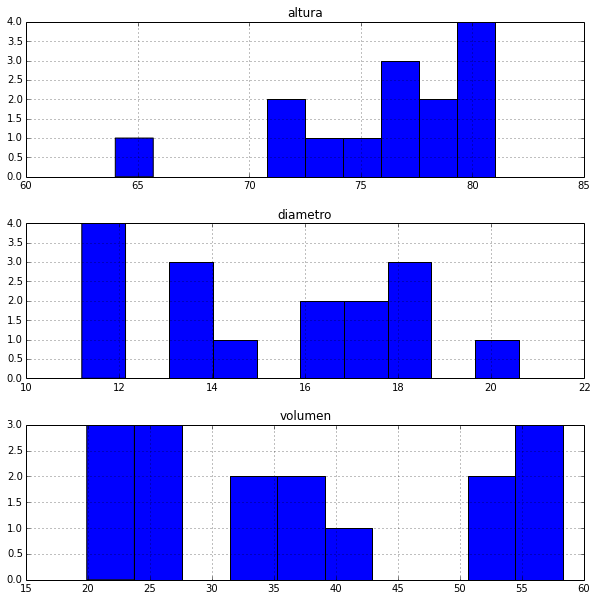

In [238]:
from matplotlib import pyplot as plt
df.hist(figsize=(10,10), layout=(3,1))
#df.hist(figsize=(8,8), layout=(3,1), by="tipo_de_arbol")
plt.show()

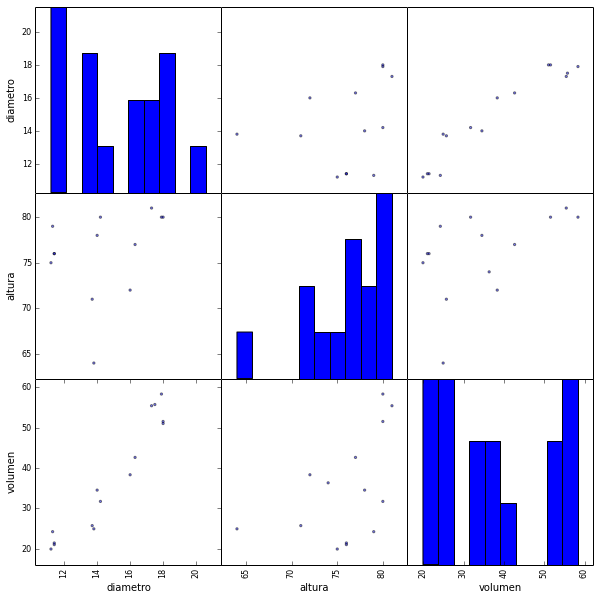

In [239]:
from matplotlib import pyplot as plt
pd.scatter_matrix(df, figsize=(10,10), range_padding=0.2)
plt.show()

In [240]:
df.tipo_de_arbol.value_counts()

Cherry Tree     11
Apple Tree       3
Cherrie Tree     2
dtype: int64

## 5.- Manipulando DataFrames
   1. Agregando columnas
   2. Borrando columnas
   3. Agregando filas
   4. Borrando filas
   5. Mask
   6. Grouping
   7. Imputación de datos
   8. Apply
   9. Merge (a la SQL)
   10. Accesamiento

### 5.1 Agregando columnas

In [241]:
df = pd.read_csv("data/data.csv", sep=";")
df["radio"] = .5 * df.diametro
df

,diametro,altura,volumen,tipo_de_arbol,radio
0,11.2,75,19.9,Cherrie Tree,5.60
1,11.3,79,24.2,Cherry Tree,5.65
2,11.4,76,21.0,Cherry Tree,5.70
3,11.4,76,21.4,Apple Tree,5.70
4,13.7,71,25.7,Cherry Tree,6.85
5,13.8,64,24.9,Cherry Tree,6.90
6,14.0,78,34.5,Cherrie Tree,7.00
7,14.2,80,31.7,Cherry Tree,7.10
8,NaN,74,36.3,Apple Tree,NaN
9,16.0,72,38.3,Cherry Tree,8.00


In [242]:
df.area = np.pi * df.radio **2
df.columns

Index([u'diametro', u'altura', u'volumen', u'tipo_de_arbol', u'radio'], dtype='object')

### 5.2 Renombrando columnas

In [243]:
df = pd.read_csv("data/data.csv", sep=";")
print( df.columns )
df.columns = ["RaDiO","AlTuRa","VoLuMeN","TiPo_De_ArBoL"]

Index([u'diametro', u'altura', u'volumen', u'tipo_de_arbol'], dtype='object')


In [248]:
print( df.columns )

Index([u'radio', u'altura', u'volumen', u'tipo_de_arbol'], dtype='object')


In [247]:
df.columns = [col.lower() for col in df.columns]
print( df.columns )

Index([u'radio', u'altura', u'volumen', u'tipo_de_arbol'], dtype='object')


### 5.3 Borrando columnas

In [258]:
df = pd.read_csv("data/data.csv", sep=";")
print( df.columns )

Index([u'diametro', u'altura', u'volumen', u'tipo_de_arbol'], dtype='object')


In [259]:
df = df[["tipo_de_arbol","volumen", "diametro"]]
df

,tipo_de_arbol,volumen,diametro
0,Cherrie Tree,19.9,11.2
1,Cherry Tree,24.2,11.3
2,Cherry Tree,21.0,11.4
3,Apple Tree,21.4,11.4
4,Cherry Tree,25.7,13.7
5,Cherry Tree,24.9,13.8
6,Cherrie Tree,34.5,14.0
7,Cherry Tree,31.7,14.2
8,Apple Tree,36.3,NaN
9,Cherry Tree,38.3,16.0


In [260]:
df = df.drop("tipo_de_arbol", axis=1)
df

,volumen,diametro
0,19.9,11.2
1,24.2,11.3
2,21.0,11.4
3,21.4,11.4
4,25.7,13.7
5,24.9,13.8
6,34.5,14.0
7,31.7,14.2
8,36.3,NaN
9,38.3,16.0


In [261]:
df.drop("diametro", axis=1, inplace=True)
df

,volumen
0,19.9
1,24.2
2,21.0
3,21.4
4,25.7
5,24.9
6,34.5
7,31.7
8,36.3
9,38.3


### 5.4 Agregando filas (indices)

In [263]:
df = pd.read_csv("data/data.csv", sep=";")
print( df.index )
df

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')


,diametro,altura,volumen,tipo_de_arbol
0,11.2,75,19.9,Cherrie Tree
1,11.3,79,24.2,Cherry Tree
2,11.4,76,21.0,Cherry Tree
3,11.4,76,21.4,Apple Tree
4,13.7,71,25.7,Cherry Tree
5,13.8,64,24.9,Cherry Tree
6,14.0,78,34.5,Cherrie Tree
7,14.2,80,31.7,Cherry Tree
8,NaN,74,36.3,Apple Tree
9,16.0,72,38.3,Cherry Tree


In [265]:
df = df.reindex( range(20) )
df

,diametro,altura,volumen,tipo_de_arbol
0,11.2,75,19.9,Cherrie Tree
1,11.3,79,24.2,Cherry Tree
2,11.4,76,21.0,Cherry Tree
3,11.4,76,21.4,Apple Tree
4,13.7,71,25.7,Cherry Tree
5,13.8,64,24.9,Cherry Tree
6,14.0,78,34.5,Cherrie Tree
7,14.2,80,31.7,Cherry Tree
8,NaN,74,36.3,Apple Tree
9,16.0,72,38.3,Cherry Tree


In [269]:
# Usando loc para acceder con notación de indices tradicional
df.loc[20, :] = [10, 20, 30, "CT"]
df

,diametro,altura,volumen,tipo_de_arbol
0,11.2,75,19.9,Cherrie Tree
1,11.3,79,24.2,Cherry Tree
2,11.4,76,21.0,Cherry Tree
3,11.4,76,21.4,Apple Tree
4,13.7,71,25.7,Cherry Tree
5,13.8,64,24.9,Cherry Tree
6,14.0,78,34.5,Cherrie Tree
7,14.2,80,31.7,Cherry Tree
8,NaN,74,36.3,Apple Tree
9,16.0,72,38.3,Cherry Tree


### 5.5 Renombrando filas (índices)

In [270]:
df = pd.read_csv("data/data.csv", sep=";")
print df.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')


In [271]:
df.index = df.index + 10
print df.index

Int64Index([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
            26],
           dtype='int64')


In [272]:
df.index = ["i_%d"%idx for idx in df.index]
print df.index

Index([u'i_10', u'i_11', u'i_12', u'i_13', u'i_14', u'i_15', u'i_16', u'i_17',
       u'i_18', u'i_19', u'i_20', u'i_21', u'i_22', u'i_23', u'i_24', u'i_25',
       u'i_26'],
      dtype='object')


### 5.6 Borrando indices

In [273]:
print df.index
df

Index([u'i_10', u'i_11', u'i_12', u'i_13', u'i_14', u'i_15', u'i_16', u'i_17',
       u'i_18', u'i_19', u'i_20', u'i_21', u'i_22', u'i_23', u'i_24', u'i_25',
       u'i_26'],
      dtype='object')


,diametro,altura,volumen,tipo_de_arbol
i_10,11.2,75,19.9,Cherrie Tree
i_11,11.3,79,24.2,Cherry Tree
i_12,11.4,76,21.0,Cherry Tree
i_13,11.4,76,21.4,Apple Tree
i_14,13.7,71,25.7,Cherry Tree
i_15,13.8,64,24.9,Cherry Tree
i_16,14.0,78,34.5,Cherrie Tree
i_17,14.2,80,31.7,Cherry Tree
i_18,NaN,74,36.3,Apple Tree
i_19,16.0,72,38.3,Cherry Tree


In [274]:
df = df.drop(["i_11","i_13","i_19"], axis=0)
print( df.index )
df

Index([u'i_10', u'i_12', u'i_14', u'i_15', u'i_16', u'i_17', u'i_18', u'i_20',
       u'i_21', u'i_22', u'i_23', u'i_24', u'i_25', u'i_26'],
      dtype='object')


,diametro,altura,volumen,tipo_de_arbol
i_10,11.2,75,19.9,Cherrie Tree
i_12,11.4,76,21.0,Cherry Tree
i_14,13.7,71,25.7,Cherry Tree
i_15,13.8,64,24.9,Cherry Tree
i_16,14.0,78,34.5,Cherrie Tree
i_17,14.2,80,31.7,Cherry Tree
i_18,NaN,74,36.3,Apple Tree
i_20,16.3,77,42.6,Cherry Tree
i_21,17.3,81,55.4,Apple Tree
i_22,17.5,NaN,55.7,Cherry Tree


In [275]:
df.drop(["i_24","i_25","i_26"], axis=0, inplace=True)
df

,diametro,altura,volumen,tipo_de_arbol
i_10,11.2,75,19.9,Cherrie Tree
i_12,11.4,76,21.0,Cherry Tree
i_14,13.7,71,25.7,Cherry Tree
i_15,13.8,64,24.9,Cherry Tree
i_16,14.0,78,34.5,Cherrie Tree
i_17,14.2,80,31.7,Cherry Tree
i_18,NaN,74,36.3,Apple Tree
i_20,16.3,77,42.6,Cherry Tree
i_21,17.3,81,55.4,Apple Tree
i_22,17.5,NaN,55.7,Cherry Tree


In [276]:
df = df[-5:]
df

,diametro,altura,volumen,tipo_de_arbol
i_18,NaN,74,36.3,Apple Tree
i_20,16.3,77,42.6,Cherry Tree
i_21,17.3,81,55.4,Apple Tree
i_22,17.5,NaN,55.7,Cherry Tree
i_23,17.9,80,58.3,Cherry Tree


**Observación**
```python
# seleccionar la columna col
# regresa una serie
df[col] 

# seleccionar las columnas col1, col2, ..., coln
# regresa dataframe
df[[col1,col2,.., coln]] 

# selecciona solo el indice inicio
# regresa un dataframe
df[inicio:(inicio+1)] 

# selecciona los indices en notacion
#regresa un dataframe
df[inicio:fin:salto] 

# seleccion mixta
# regresa un dataframe
df.loc[inicio:fin:salto, col1:col2]
```

### 5.7 Masking

In [277]:
df = pd.read_csv("data/data.csv", sep=";")
vol_mean = df.volumen.mean()
vol_std = df.volumen.std()

In [279]:
mask_1 = df.altura < 80
mask_2 =  df.volumen <= vol_mean + vol_std
df1 = df[ mask_1 & mask_2 ]
df1

,diametro,altura,volumen,tipo_de_arbol
0,11.2,75,19.9,Cherrie Tree
1,11.3,79,24.2,Cherry Tree
2,11.4,76,21.0,Cherry Tree
3,11.4,76,21.4,Apple Tree
4,13.7,71,25.7,Cherry Tree
5,13.8,64,24.9,Cherry Tree
6,14.0,78,34.5,Cherrie Tree
8,NaN,74,36.3,Apple Tree
9,16.0,72,38.3,Cherry Tree
10,16.3,77,42.6,Cherry Tree


In [280]:
# Si se hace dinamicamente, utilizar suficientes parentesis
#df2 = df[ ((vol_mean - vol_std) <= df.volumen) & (df.volumen <= (vol_mean + vol_std) ) ]
df2 = df[ (df.volumen >=(vol_mean - vol_std)) & (df.volumen <= (vol_mean + vol_std) ) ]
df2

,diametro,altura,volumen,tipo_de_arbol
1,11.3,79,24.2,Cherry Tree
4,13.7,71,25.7,Cherry Tree
5,13.8,64,24.9,Cherry Tree
6,14.0,78,34.5,Cherrie Tree
7,14.2,80,31.7,Cherry Tree
8,NaN,74,36.3,Apple Tree
9,16.0,72,38.3,Cherry Tree
10,16.3,77,42.6,Cherry Tree


In [281]:
# A veces para simplificar numpy ayuda
mask_1 = df.volumen >= (vol_mean - vol_std)
mask_2 = df.volumen <= (vol_mean + vol_std)
mask = np.logical_and(mask_1, mask_2)
df3 = df[np.logical_not(mask)]
df3

,diametro,altura,volumen,tipo_de_arbol
0,11.2,75,19.9,Cherrie Tree
2,11.4,76,21.0,Cherry Tree
3,11.4,76,21.4,Apple Tree
11,17.3,81,55.4,Apple Tree
12,17.5,NaN,55.7,Cherry Tree
13,17.9,80,58.3,Cherry Tree
14,18.0,80,51.5,Cherry Tree
15,18.0,NaN,51.0,NaN
16,20.6,NaN,NaN,Cherry Tree


### 5.8.- Grouping

In [282]:
df = pd.read_csv("data/data.csv", sep=";")
df.columns

Index([u'diametro', u'altura', u'volumen', u'tipo_de_arbol'], dtype='object')

In [283]:
g = df.groupby("tipo_de_arbol")
print( g )

In [284]:
print( g.count() )

               diametro  altura  volumen
tipo_de_arbol                           
Apple Tree            2       3        3
Cherrie Tree          2       2        2
Cherry Tree          11       9       10


In [285]:
print( g.sum() ) # .mean(), .std()

               diametro  altura  volumen
tipo_de_arbol                           
Apple Tree         28.7     231    113.1
Cherrie Tree       25.2     153     54.4
Cherry Tree       170.7     679    373.9


In [286]:
# Ejemplo real
df[["tipo_de_arbol","diametro", "altura"]].groupby("tipo_de_arbol").mean()

,diametro,altura
tipo_de_arbol,,
Apple Tree,14.350000,77.000000
Cherrie Tree,12.600000,76.500000
Cherry Tree,15.518182,75.444444


### 5.9.- Imputación de datos

In [288]:
# Antes de imputar datos, siempre explorar
df.describe(include="all")

,diametro,altura,volumen,tipo_de_arbol
count,16.000000,14.000000,16.000000,16
unique,NaN,NaN,NaN,3
top,NaN,NaN,NaN,Cherry Tree
freq,NaN,NaN,NaN,11
mean,15.162500,75.928571,37.025000,NaN
std,2.948418,4.615430,13.773816,NaN
min,11.200000,64.000000,19.900000,NaN
25%,13.125000,74.250000,24.725000,NaN
50%,15.100000,76.500000,35.400000,NaN
75%,17.600000,79.750000,51.125000,NaN


In [290]:
# Imputación manual de datos (incorrecto)
df["tipo_de_arbol"][df.tipo_de_arbol=="Cherrie Tree"] = "Cherry Tree"
df

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,diametro,altura,volumen,tipo_de_arbol
0,11.2,75,19.9,Cherry Tree
1,11.3,79,24.2,Cherry Tree
2,11.4,76,21.0,Cherry Tree
3,11.4,76,21.4,Apple Tree
4,13.7,71,25.7,Cherry Tree
5,13.8,64,24.9,Cherry Tree
6,14.0,78,34.5,Cherry Tree
7,14.2,80,31.7,Cherry Tree
8,NaN,74,36.3,Apple Tree
9,16.0,72,38.3,Cherry Tree


In [291]:
# Imputación manual de datos
df = pd.read_csv("data/data.csv", sep=";")
index_mask = (df.tipo_de_arbol=="Cherrie Tree")
df.loc[index_mask, "tipo_de_arbol"] = "Cherry Tree" # .loc es esencial
df

,diametro,altura,volumen,tipo_de_arbol
0,11.2,75,19.9,Cherry Tree
1,11.3,79,24.2,Cherry Tree
2,11.4,76,21.0,Cherry Tree
3,11.4,76,21.4,Apple Tree
4,13.7,71,25.7,Cherry Tree
5,13.8,64,24.9,Cherry Tree
6,14.0,78,34.5,Cherry Tree
7,14.2,80,31.7,Cherry Tree
8,NaN,74,36.3,Apple Tree
9,16.0,72,38.3,Cherry Tree


In [292]:
# Imputación de datos: llenar NaNs con promedio
df = pd.read_csv("data/data.csv", sep=";")
df1 = df.fillna(df.mean())
df1

,diametro,altura,volumen,tipo_de_arbol
0,11.2000,75.000000,19.900,Cherrie Tree
1,11.3000,79.000000,24.200,Cherry Tree
2,11.4000,76.000000,21.000,Cherry Tree
3,11.4000,76.000000,21.400,Apple Tree
4,13.7000,71.000000,25.700,Cherry Tree
5,13.8000,64.000000,24.900,Cherry Tree
6,14.0000,78.000000,34.500,Cherrie Tree
7,14.2000,80.000000,31.700,Cherry Tree
8,15.1625,74.000000,36.300,Apple Tree
9,16.0000,72.000000,38.300,Cherry Tree


In [293]:
# Imputación de datos: llenar NaNs con valor
df2 = df.fillna(0)
df2

,diametro,altura,volumen,tipo_de_arbol
0,11.2,75,19.9,Cherrie Tree
1,11.3,79,24.2,Cherry Tree
2,11.4,76,21.0,Cherry Tree
3,11.4,76,21.4,Apple Tree
4,13.7,71,25.7,Cherry Tree
5,13.8,64,24.9,Cherry Tree
6,14.0,78,34.5,Cherrie Tree
7,14.2,80,31.7,Cherry Tree
8,0.0,74,36.3,Apple Tree
9,16.0,72,38.3,Cherry Tree


In [294]:
# Imputación de datos: desechar filas con NaN
df3 = df.dropna()
df3

,diametro,altura,volumen,tipo_de_arbol
0,11.2,75,19.9,Cherrie Tree
1,11.3,79,24.2,Cherry Tree
2,11.4,76,21.0,Cherry Tree
3,11.4,76,21.4,Apple Tree
4,13.7,71,25.7,Cherry Tree
5,13.8,64,24.9,Cherry Tree
6,14.0,78,34.5,Cherrie Tree
7,14.2,80,31.7,Cherry Tree
9,16.0,72,38.3,Cherry Tree
10,16.3,77,42.6,Cherry Tree


### 5.10 Apply

In [295]:
df = pd.read_csv("data/data.csv", sep=";")
df1 = df.diametro.apply(lambda x: x*2)
df1

0     22.4
1     22.6
2     22.8
3     22.8
4     27.4
5     27.6
6     28.0
7     28.4
8      NaN
9     32.0
10    32.6
11    34.6
12    35.0
13    35.8
14    36.0
15    36.0
16    41.2
Name: diametro, dtype: float64

In [296]:
# Aplicación incorrecta
df2 = df["tipo_de_arbol"].apply(str.upper) # Error
df2

TypeError: descriptor 'upper' requires a 'str' object but received a 'float'

In [297]:
# Aplicación correcta
df2 = df["tipo_de_arbol"].apply(lambda s: str(s).upper() )
df2

0     CHERRIE TREE
1      CHERRY TREE
2      CHERRY TREE
3       APPLE TREE
4      CHERRY TREE
5      CHERRY TREE
6     CHERRIE TREE
7      CHERRY TREE
8       APPLE TREE
9      CHERRY TREE
10     CHERRY TREE
11      APPLE TREE
12     CHERRY TREE
13     CHERRY TREE
14     CHERRY TREE
15             NAN
16     CHERRY TREE
Name: tipo_de_arbol, dtype: object

In [298]:
# Error (o no?)
df3 = df.apply(lambda x: x*2)
df3

,diametro,altura,volumen,tipo_de_arbol
0,22.4,150,39.8,Cherrie TreeCherrie Tree
1,22.6,158,48.4,Cherry TreeCherry Tree
2,22.8,152,42.0,Cherry TreeCherry Tree
3,22.8,152,42.8,Apple TreeApple Tree
4,27.4,142,51.4,Cherry TreeCherry Tree
5,27.6,128,49.8,Cherry TreeCherry Tree
6,28.0,156,69.0,Cherrie TreeCherrie Tree
7,28.4,160,63.4,Cherry TreeCherry Tree
8,NaN,148,72.6,Apple TreeApple Tree
9,32.0,144,76.6,Cherry TreeCherry Tree


#### Atajo

Para usar las operaciones de string en una columna de strings, es posible utilizar la siguiente notación para ahorrar espacio.

In [299]:
df.tipo_de_arbol.str.upper()

0     CHERRIE TREE
1      CHERRY TREE
2      CHERRY TREE
3       APPLE TREE
4      CHERRY TREE
5      CHERRY TREE
6     CHERRIE TREE
7      CHERRY TREE
8       APPLE TREE
9      CHERRY TREE
10     CHERRY TREE
11      APPLE TREE
12     CHERRY TREE
13     CHERRY TREE
14     CHERRY TREE
15             NaN
16     CHERRY TREE
Name: tipo_de_arbol, dtype: object

In [300]:
df.tipo_de_arbol.str.len()

0     12
1     11
2     11
3     10
4     11
5     11
6     12
7     11
8     10
9     11
10    11
11    10
12    11
13    11
14    11
15   NaN
16    11
Name: tipo_de_arbol, dtype: float64

In [301]:
df.tipo_de_arbol.str[3:-3]

0     rrie T
1      rry T
2      rry T
3       le T
4      rry T
5      rry T
6     rrie T
7      rry T
8       le T
9      rry T
10     rry T
11      le T
12     rry T
13     rry T
14     rry T
15       NaN
16     rry T
Name: tipo_de_arbol, dtype: object

### 5.11 Merge

In [302]:
df1 = pd.read_csv("data/data.csv", sep=";")
df1

,diametro,altura,volumen,tipo_de_arbol
0,11.2,75,19.9,Cherrie Tree
1,11.3,79,24.2,Cherry Tree
2,11.4,76,21.0,Cherry Tree
3,11.4,76,21.4,Apple Tree
4,13.7,71,25.7,Cherry Tree
5,13.8,64,24.9,Cherry Tree
6,14.0,78,34.5,Cherrie Tree
7,14.2,80,31.7,Cherry Tree
8,NaN,74,36.3,Apple Tree
9,16.0,72,38.3,Cherry Tree


In [304]:
df2 = pd.DataFrame(data={"tipo_de_arbol":["Cherry Tree", "Apple Tree", "Pear Tree"], 
                         "fruto":["guinda","manzana", "pera"], 
                         "precio_pesos_por_kg":[500, 2000, np.nan]})
df2

,fruto,precio_pesos_por_kg,tipo_de_arbol
0,guinda,500,Cherry Tree
1,manzana,2000,Apple Tree
2,pera,NaN,Pear Tree


In [305]:
df3 = df1.merge(df2, how="left", on="tipo_de_arbol")
df3

,diametro,altura,volumen,tipo_de_arbol,fruto,precio_pesos_por_kg
0,11.2,75,19.9,Cherrie Tree,NaN,NaN
1,11.3,79,24.2,Cherry Tree,guinda,500
2,11.4,76,21.0,Cherry Tree,guinda,500
3,11.4,76,21.4,Apple Tree,manzana,2000
4,13.7,71,25.7,Cherry Tree,guinda,500
5,13.8,64,24.9,Cherry Tree,guinda,500
6,14.0,78,34.5,Cherrie Tree,NaN,NaN
7,14.2,80,31.7,Cherry Tree,guinda,500
8,NaN,74,36.3,Apple Tree,manzana,2000
9,16.0,72,38.3,Cherry Tree,guinda,500


In [306]:
df3 = df1.merge(df2, how="right", on="tipo_de_arbol")
df3

,diametro,altura,volumen,tipo_de_arbol,fruto,precio_pesos_por_kg
0,11.3,79,24.2,Cherry Tree,guinda,500
1,11.4,76,21.0,Cherry Tree,guinda,500
2,13.7,71,25.7,Cherry Tree,guinda,500
3,13.8,64,24.9,Cherry Tree,guinda,500
4,14.2,80,31.7,Cherry Tree,guinda,500
5,16.0,72,38.3,Cherry Tree,guinda,500
6,16.3,77,42.6,Cherry Tree,guinda,500
7,17.5,NaN,55.7,Cherry Tree,guinda,500
8,17.9,80,58.3,Cherry Tree,guinda,500
9,18.0,80,51.5,Cherry Tree,guinda,500


In [307]:
df3 = df1.merge(df2, how="inner", on="tipo_de_arbol")
df3

,diametro,altura,volumen,tipo_de_arbol,fruto,precio_pesos_por_kg
0,11.3,79,24.2,Cherry Tree,guinda,500
1,11.4,76,21.0,Cherry Tree,guinda,500
2,13.7,71,25.7,Cherry Tree,guinda,500
3,13.8,64,24.9,Cherry Tree,guinda,500
4,14.2,80,31.7,Cherry Tree,guinda,500
5,16.0,72,38.3,Cherry Tree,guinda,500
6,16.3,77,42.6,Cherry Tree,guinda,500
7,17.5,NaN,55.7,Cherry Tree,guinda,500
8,17.9,80,58.3,Cherry Tree,guinda,500
9,18.0,80,51.5,Cherry Tree,guinda,500


In [308]:
df3 = df1.merge(df2, how="outer", on="tipo_de_arbol")
df3

,diametro,altura,volumen,tipo_de_arbol,fruto,precio_pesos_por_kg
0,11.2,75,19.9,Cherrie Tree,NaN,NaN
1,14.0,78,34.5,Cherrie Tree,NaN,NaN
2,11.3,79,24.2,Cherry Tree,guinda,500
3,11.4,76,21.0,Cherry Tree,guinda,500
4,13.7,71,25.7,Cherry Tree,guinda,500
5,13.8,64,24.9,Cherry Tree,guinda,500
6,14.2,80,31.7,Cherry Tree,guinda,500
7,16.0,72,38.3,Cherry Tree,guinda,500
8,16.3,77,42.6,Cherry Tree,guinda,500
9,17.5,NaN,55.7,Cherry Tree,guinda,500


## Guardando datos
  2. **csv**
  3. **json**
  4. **excel**

  Lo más importante es tener cuidado de cómo se guardan los nombres de las columnas (header), y el indice (index). 
  
  Depende de la utilización, pero mi recomendación es guardar el header explícitamente y guardar el index como una columna.

In [311]:
# guardar un csv
df = pd.read_csv("data/data.csv", sep=";")
df = df[df.tipo_de_arbol=="Cherry Tree"]
df.to_csv("data/output.csv", sep="|", index=True) # header=True by default
df

,diametro,altura,volumen,tipo_de_arbol
1,11.3,79,24.2,Cherry Tree
2,11.4,76,21.0,Cherry Tree
4,13.7,71,25.7,Cherry Tree
5,13.8,64,24.9,Cherry Tree
7,14.2,80,31.7,Cherry Tree
9,16.0,72,38.3,Cherry Tree
10,16.3,77,42.6,Cherry Tree
12,17.5,NaN,55.7,Cherry Tree
13,17.9,80,58.3,Cherry Tree
14,18.0,80,51.5,Cherry Tree


In [312]:
# Leer el csv anterior
df2 = pd.read_csv("data/output.csv", sep="|", index_col=0) # get index from first column
df2

,diametro,altura,volumen,tipo_de_arbol
1,11.3,79,24.2,Cherry Tree
2,11.4,76,21.0,Cherry Tree
4,13.7,71,25.7,Cherry Tree
5,13.8,64,24.9,Cherry Tree
7,14.2,80,31.7,Cherry Tree
9,16.0,72,38.3,Cherry Tree
10,16.3,77,42.6,Cherry Tree
12,17.5,NaN,55.7,Cherry Tree
13,17.9,80,58.3,Cherry Tree
14,18.0,80,51.5,Cherry Tree


In [313]:
%%bash
cat data/output.csv

|diametro|altura|volumen|tipo_de_arbol
1|11.3|79.0|24.2|Cherry Tree
2|11.4|76.0|21.0|Cherry Tree
4|13.7|71.0|25.7|Cherry Tree
5|13.8|64.0|24.9|Cherry Tree
7|14.2|80.0|31.7|Cherry Tree
9|16.0|72.0|38.3|Cherry Tree
10|16.3|77.0|42.6|Cherry Tree
12|17.5||55.7|Cherry Tree
13|17.9|80.0|58.3|Cherry Tree
14|18.0|80.0|51.5|Cherry Tree
16|20.6|||Cherry Tree


In [314]:
# guardar un json
df = pd.read_csv("data/data.csv", sep=";")
df = df[df.tipo_de_arbol=="Cherry Tree"]
df.to_json("data/output.json")
df

,diametro,altura,volumen,tipo_de_arbol
1,11.3,79,24.2,Cherry Tree
2,11.4,76,21.0,Cherry Tree
4,13.7,71,25.7,Cherry Tree
5,13.8,64,24.9,Cherry Tree
7,14.2,80,31.7,Cherry Tree
9,16.0,72,38.3,Cherry Tree
10,16.3,77,42.6,Cherry Tree
12,17.5,NaN,55.7,Cherry Tree
13,17.9,80,58.3,Cherry Tree
14,18.0,80,51.5,Cherry Tree


In [315]:
# Leyendo el json anterior
df2 = pd.read_json("data/output.json")
df2

,altura,diametro,tipo_de_arbol,volumen
1,79,11.3,Cherry Tree,24.2
10,77,16.3,Cherry Tree,42.6
12,NaN,17.5,Cherry Tree,55.7
13,80,17.9,Cherry Tree,58.3
14,80,18.0,Cherry Tree,51.5
16,NaN,20.6,Cherry Tree,NaN
2,76,11.4,Cherry Tree,21.0
4,71,13.7,Cherry Tree,25.7
5,64,13.8,Cherry Tree,24.9
7,80,14.2,Cherry Tree,31.7


In [316]:
%%bash
cat data/output.json

{"diametro":{"1":11.3,"2":11.4,"4":13.7,"5":13.8,"7":14.2,"9":16.0,"10":16.3,"12":17.5,"13":17.9,"14":18.0,"16":20.6},"altura":{"1":79.0,"2":76.0,"4":71.0,"5":64.0,"7":80.0,"9":72.0,"10":77.0,"12":null,"13":80.0,"14":80.0,"16":null},"volumen":{"1":24.2,"2":21.0,"4":25.7,"5":24.9,"7":31.7,"9":38.3,"10":42.6,"12":55.7,"13":58.3,"14":51.5,"16":null},"tipo_de_arbol":{"1":"Cherry Tree","2":"Cherry Tree","4":"Cherry Tree","5":"Cherry Tree","7":"Cherry Tree","9":"Cherry Tree","10":"Cherry Tree","12":"Cherry Tree","13":"Cherry Tree","14":"Cherry Tree","16":"Cherry Tree"}}

## Desafío para la casa

Descargar algún archivo de interés:
* Abrir el archivo.
* Explorar los datos
* Visualizar los datos
* Completar los datos incompletos
* Guardar el archivo

### ¡Gracias por la atención!